In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np

from IPython.display import Math, clear_output

In [ ]:
def linear_function(theta, x):
    return theta[0] + theta[1] * x

def plot_function(theta, X, color):
    X_new = [min(X) - 1, max(X) + 1]
    y_new = [linear_function(theta, x) for x in X_new]
    plt.plot(X_new, y_new, linewidth=2, color=color)

def plot_points(X, y):
    plt.figure(figsize=(20, 10))
    plt.scatter(X, y, s=200)
    plt.xlabel("Liczba pożarów")
    plt.ylabel("Liczba włamań")

In [ ]:
# w powyższych komórkach nic nie zmieniamy

## Regresja liniowa

Plik `fires_thefts.csv` zawiera rzeczywiste dane zebrane przez _U.S. Commission on Civil Rights_, przedstawiające liczbę pożarów w danej dzielnicy na tysiąc gospodarstw domowych (pierwsza kolumna) oraz liczbę włamań w tej samej dzielnicy na tysiąc mieszkańców (druga kolumna). Celem jest stworzenie modelu przewidującego liczbę włamań na podstawie liczby pożarów.

### Zadanie 1

Odpowiedz na pytanie: jak będą wyglądały kolejne kroki metody gradientu prostego, gdy okaże się, że w pierwszym kroku współczynniki theta zostały zainicjalizowane wartościami wskazującymi na minimum lokalne?

#### Odp. przestajemy szukać minimum, znaleźliśmy optymalny model

### Zadanie 2

Wczytaj dane z pliku, a następnie stwórz zmienne X i y oraz przypisz im odpowiednie wartości.

In [ ]:
DATA_PATH = 'fires_thefts.csv'

df = pd.read_csv(DATA_PATH)
df

,fires,thefts
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53
5,34.1,68
6,11.0,75
7,6.9,18
8,7.3,31
9,15.1,25


In [ ]:
df.shape

(42, 2)

In [ ]:
X = df[['fires']].values
y = df['thefts'].values

In [ ]:
print(X)
type(X)

[[ 6.2]
 [ 9.5]
 [10.5]
 [ 7.7]
 [ 8.6]
 [34.1]
 [11. ]
 [ 6.9]
 [ 7.3]
 [15.1]
 [29.1]
 [ 2.2]
 [ 5.7]
 [ 2. ]
 [ 2.5]
 [ 4. ]
 [ 5.4]
 [ 2.2]
 [ 7.2]
 [15.1]
 [16.5]
 [18.4]
 [36.2]
 [39.7]
 [18.5]
 [23.3]
 [12.2]
 [ 5.6]
 [21.8]
 [21.6]
 [ 9. ]
 [ 3.6]
 [ 5. ]
 [28.6]
 [17.4]
 [11.3]
 [ 3.4]
 [11.9]
 [10.5]
 [10.7]
 [10.8]
 [ 4.8]]


numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

### Zadanie 3

Dokończ implementację funkcji J, która jest funkcją kosztu i realizuję metodę najmniejszych kwadratów. dla przypomnienia, jej wzór wygląda następująco:

$$\begin{array}{rll} J(\theta) &=& \dfrac{1}{2m} \displaystyle\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})  - y^{(i)}\right)^2
\end{array} $$

gdzie $m$ - liczba przykładów w zestawie danych

In [ ]:
def J(h, theta, X, y):
    # h to funkcja
    # theta to lista współczynników: [theta_0, theta_1]
    # X i y to zmienne przechowujące dane
    # wywołanie tej funkcji w sposób J(linear_function, [1, 2], X, y) powinno zwrócić wartość 228.41857142857137
    m = len(X)
    # sum = 0
    # for i in range(m):
    #   sum += (h(theta, X[i, 0]) - y[i])**2

    # return sum/(2*m)
    return sum([(h(theta, X[i, 0]) - y[i])**2 for i in range(m)])/(2*m)


In [ ]:
J(linear_function, [1, 2], X, y)

228.4185714285714

### Zadanie 4

Dobierz ręcznie, przy pomocy poniższych widgetów (nie zmieniając kodu) parametry theta w taki sposób, by wartość funkcji kosztu była możliwie jak najmniejsza

In [ ]:
slider_theta_0 = widgets.FloatSlider(min=-20, max=20, step=0.1, value=0, description=r'theta0', layout={'width': "auto"})
slider_theta_1 = widgets.FloatSlider(min=-20, max=20, step=0.1, value=0, description=r'theta1', layout={'width': "auto"})
out = widgets.Output()
button = widgets.Button(width=100, description="Show")

def btn_event_handler(event):
    with out:
        clear_output(wait=True)
        plot_points(X, y)
        plot_function([slider_theta_0.value, slider_theta_1.value], X, 'r')
        plt.show()
        display(Math(rf"\Large J(\theta) = {J(linear_function, [slider_theta_0.value, slider_theta_1.value], X, y):.4f}"))
        
        
with out:
    plot_points(X, y)
    plt.show()

button.on_click(btn_event_handler)
display(widgets.VBox([slider_theta_0, slider_theta_1, button]))
display(out)

# Parametry:
# theta0 = 12.10
# theta1 = 1.6
# Wynik = 184.9472

Output()

### Zadanie 5

Wytrenuj na tych danych model regresji liniowej

In [ ]:
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sma

In [ ]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
X2 = sma.add_constant(X)
OLS_model = sma.OLS(y, X2)

print(OLS_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     17.45
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           0.000155
Time:                        16:37:31   Log-Likelihood:                -183.25
No. Observations:                  42   AIC:                             370.5
Df Residuals:                      40   BIC:                             374.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9952      4.995      3.403      0.0

### Zadanie 6

Korzystając z zaimplementowanych wyżej funkcji oraz współczynników wytrenowanego modelu nanieś na wykres prostę regresyjną i oblicz wartość funkcji kosztu dla tych współczynników. Spójrz, jak daleko byłeś od idealnego rozwiązania dobierając parametry ręcznie.

180.4100782065511


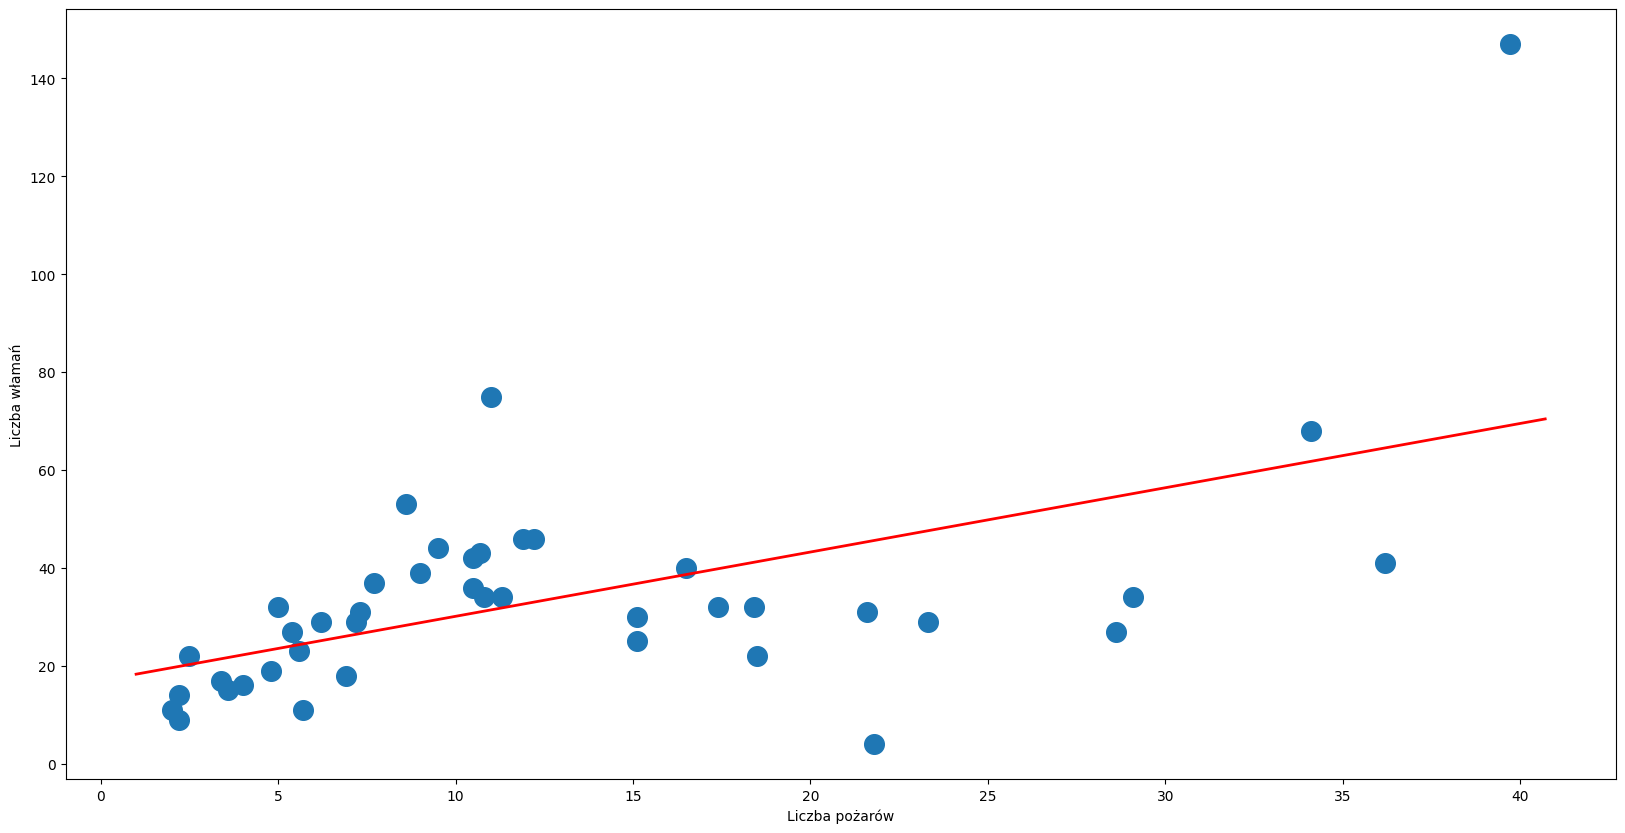

In [ ]:
plot_points(X, y)
plot_function(theta=[model.intercept_, model.coef_[0]], X=X, color='red')
print(J(h=linear_function, theta=[model.intercept_, model.coef_[0]], X=X, y=y))

### Zadanie 7

Wykorzystując uzyskany model regresyjny przepowiedz liczbę włamań na tysiąc mieszkańców dla dzielnic, w których występują średnio kolejno: 10, 20 i 50 pożarów na tysiąc gospodarstw domowych.

In [ ]:
model.predict(np.array([[10],[20],[50]]))

array([30.12971728, 43.26427733, 82.66795748])

In [ ]:
house_df = pd.read_csv("housing.csv", sep="\t")
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
X = house_df.loc[:, house_df.columns != "target"]
y = house_df["target"]

In [ ]:
X2 = sma.add_constant(X)
OLS_model = sma.OLS(y, X2)

print(OLS_model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:56:13   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

In [ ]:
X = house_df.loc[:, house_df.columns != "target"].values
y = house_df["target"].values

In [ ]:
house_model = LinearRegression()
house_model.fit(X,y)

LinearRegression()

In [ ]:
predict_data = np.array([[7.4564, 25, 8.76, 3.21, 150, 1.56, 32.45, -56.23]])
house_model.predict(predict_data)

array([-21.56479268])

### Zadanie 8

Wytrenuj model regresyjny drzewa decyzyjnego i dokonaj predykcji dla tych samych wartości pożarów na tysiąc gospodarstw domowych co wyżej. Porównaj otrzymane wyniki.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

In [ ]:
predict_data = np.array([[10],[20],[50]])
model.predict(predict_data)

array([ 44.,  22., 147.])

### Zadanie 9

Potrafimy wytrenować model i dokonać predykcji dla przykładowych danych. Ale skąd mamy wiedzieć, na ile jest on dobry? Zastanów się, w jaki sposób moglibyśmy zbadać skuteczność takiego modelu - jak sprawdzić, czy i jak często ma rację, albo się myli?

Współczynnik R2 - Możemy skorzystać ze współczynnika determinacji, który jest opisową miarą siły liniowego związku między zmiennymi, czyli miarą dopasowania linii regresji do danych.

MAE (Mean Absolute Error) mierzy średnią różnicę pomiędzy wartościami przewidzianymi a rzeczywistymi. 

$$\begin{array}{rll} MAE &=& \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} \left|y_i  - \hat{y_i}\right|
\end{array} $$

MSE (Mean Squared Error) podobnie jak MAE będzie skupiała się bardziej na dużych błędach.

$$\begin{array}{rll} MSE &=& \dfrac{1}{n} \displaystyle\sum_{i=1}^{n} {\left(y_i  - \hat{y_i}\right)}^2
\end{array} $$

RMSE (Root Mean Squared Error) to pierwiastek kwadratowy z MSE.

$$\begin{array}{rll} RMSE &=& \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^{n} {\left(y_i  - \hat{y_i}\right)}^2}
\end{array} $$